In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bf_df = pd.read_csv("BlackFriday.csv")

In [3]:
bf_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,NaN,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
bf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537452 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
bf_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
bf_df.drop(["User_ID" , "Product_ID" , "Stay_In_Current_City_Years" ] , axis=1 ,inplace=False)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,NaN,0,12,14.0,NaN,1057
4,M,55+,16,C,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...
537572,M,36-45,16,C,0,1,2.0,NaN,11664
537573,M,36-45,16,C,0,1,15.0,16.0,19196
537574,M,36-45,16,C,0,8,15.0,NaN,8043
537575,M,36-45,16,C,0,5,NaN,NaN,7172


In [7]:
bf_df["City_Category"] = bf_df["City_Category"].fillna("C")

In [8]:
bf_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,C,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
bf_df["City_Category"] = bf_df["City_Category"].map({
    "A":"Metro Cities",
    "B":"Small Towns",
    "C":"Villages"})

In [11]:
bf_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,Metro Cities,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,Metro Cities,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,Metro Cities,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,Villages,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,Villages,4+,0,8,NaN,NaN,7969


In [12]:
bf_df.rename(columns = {'Product_Category_1':'Baseball Caps' ,'Product_Category_2':'Wine Tumblers',
                        'Product_Category_3':'Pet Raincoats'} , inplace=True)

In [13]:
bf_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
0,1000001,P00069042,F,0-17,10,Metro Cities,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,Metro Cities,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,Metro Cities,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,Villages,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,Villages,4+,0,8,NaN,NaN,7969


In [14]:
bf_df["Marital_Status"] = bf_df["Marital_Status"].map({
    1 : "married",
    0 : "un_married"
})

In [15]:
bf_df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
0,1000001,P00069042,F,0-17,10,Metro Cities,2,un_married,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,Metro Cities,2,un_married,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,Metro Cities,2,un_married,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,Villages,2,un_married,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,Villages,4+,un_married,8,NaN,NaN,7969


In [16]:
bf_df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
0,1000001,P00069042,F,0-17,10,Metro Cities,2,un_married,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,Metro Cities,2,un_married,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,Metro Cities,2,un_married,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,Villages,2,un_married,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,Villages,4+,un_married,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,Metro Cities,3,un_married,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,Villages,2,married,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,Small Towns,2,married,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,Small Towns,2,married,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,Metro Cities,1,married,8,NaN,NaN,7871


In [18]:
print(pd.crosstab(bf_df.Gender , bf_df.City_Category))

City_Category  Metro Cities  Small Towns  Villages
Gender                                            
F                     34797        56483     40917
M                    109816       169961    125603


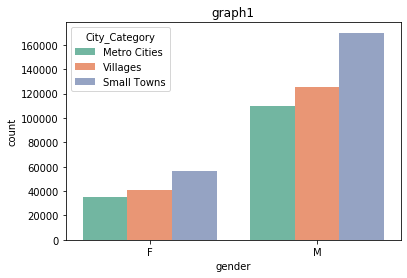

In [19]:
ax = sns.countplot(x='Gender' , hue='City_Category' , palette='Set2' , data = bf_df)
ax.set(title='graph1', xlabel='gender',ylabel='count')
plt.show()

In [21]:
pd.crosstab(bf_df.Gender , bf_df['Baseball Caps'])

Baseball Caps,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Gender,,,,,,,,,,,,,,,,,,
F,24401,5573,5874,3572,41199,4475,928,32947,70,1138,4659,1497,1428,613,1023,2363,61,376
M,113952,17926,13975,7995,107393,15689,2740,79185,334,3894,19301,2378,4012,887,5180,7334,506,2699


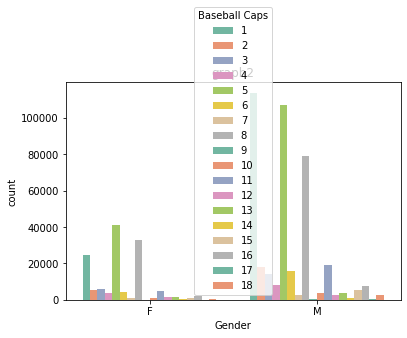

In [22]:
ax = sns.countplot(x='Gender' , hue='Baseball Caps' , palette='Set2' , data = bf_df)
ax.set(title='graph2')
plt.show()

In [23]:
pd.crosstab(bf_df.Gender , bf_df['Wine Tumblers'])

Wine Tumblers,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Gender,,,,,,,,,,,,,,,,,
F,9039,611,7451,6062,3242,133,16216,1480,718,2708,1706,2619,19309,6328,9318,2441,469
M,39442,2224,17774,19812,13009,482,46842,4111,2273,11237,3713,7750,34849,30989,33284,10689,2261


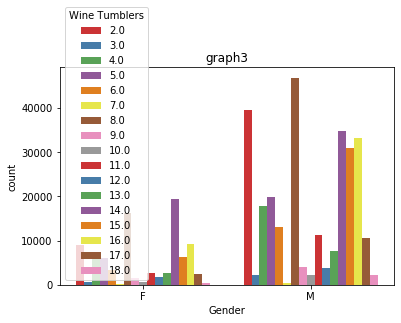

In [24]:
ax = sns.countplot(x='Gender' , hue='Wine Tumblers' , palette='Set1' , data = bf_df)
ax.set(title='graph3')
plt.show()

In [25]:
bf_df.City_Category.value_counts()

Small Towns     226444
Villages        166520
Metro Cities    144613
Name: City_Category, dtype: int64